# Applicazioni della CTT {#sec-ctt-applications}

**Prerequisiti**

**Concetti e Competenze Chiave**

**Preparazione del Notebook**

In [11]:
# Carica il file _common.R per impostazioni di pacchetti e opzioni
here::here("code", "_common.R") |> source()

# Carica pacchetti aggiuntivi
pacman::p_load(lavaan, modelsummary, foreach, ggridges, truncnorm, cmdstanr, doParallel)

## Introduzione

Questo capitolo si focalizza sull'esplorazione di diverse applicazioni della Teoria Classica dei Test (CTT). Innanzitutto, verrà analizzato il metodo per determinare il numero di item necessari al fine di ottenere un livello specifico di affidabilità. Successivamente, si approfondirà il concetto di correlazione disattenuata e si esaminerà il metodo proposto per mitigare tale disattenuazione. Infine, verrà presentato l'utilizzo del metodo di Kelly per migliorare la stima dei punteggi reali a livello individuale, e sarà esaminato come i modelli bayesiani gerarchici rappresentino un'alternativa più moderna a tale approccio.

## Stimare un Cambiamento Clinicamente Significativo

In psicologia clinica, uno dei principali problemi è determinare se si sia verificato un cambiamento clinicamente significativo in un individuo. Le metodologie utilizzate per questa valutazione sono generalmente suddivise in due categorie: i metodi "basati su ancoraggi" e quelli "basati sulla distribuzione" [@blampied2022reliable].

I metodi basati su ancoraggi definiscono un cambiamento clinicamente significativo come una variazione nei punteggi che corrisponde a un evento clinico rilevante. In altre parole, si considera che un cambiamento sia significativo se riflette un miglioramento o peggioramento percepito in seguito a un evento clinico importante, come ad esempio il miglioramento dopo un intervento terapeutico. I metodi basati sulla distribuzione, invece, utilizzano gli errori di misurazione psicometrica come parametro per valutare la significatività clinica del cambiamento. Uno dei primi metodi di questo tipo è stato l’indice di cambiamento affidabile, o Reliable Change Index (RCI), proposto da Jacobson e Truax. Questo indice si basa sull’errore standard della differenza (SED), che a sua volta è derivato dall'errore standard di misura (SEM). Quest'ultimo è calcolato come: 

$$
SEM = s_x \sqrt{1 - r_{xx'}},
$$

dove $s_x$ è la deviazione standard dei punteggi al pre-test e $r_{xx'}$ è la affidabilità dello strumento di misura. 

Un cambiamento è considerato clinicamente significativo se supera l'errore di misura intrinseco, ossia la variabilità casuale che può essere attribuita all'errore di misurazione e non a un cambiamento reale.

### Calcolo del Reliable Change Index (RCI)

Per comprendere come si calcola il Reliable Change Index, è utile ricordare che qualsiasi misurazione può essere scomposta in due componenti: il punteggio reale (o vero) e un componente di errore. Possiamo rappresentare qualsiasi misurazione come:

$$
X = T \pm E,
$$

dove $X$ è il punteggio osservato, $T$ il punteggio vero e $E$ l’errore di misurazione. Se un cambiamento effettivo si è verificato nel tempo per un individuo nella dimensione catturata dalla variabile dipendente e all'interno della sensibilità dello strumento di misurazione, allora il punteggio vero al tempo $t1$ sarà diverso dal punteggio vero al tempo $t2$. Tuttavia, data la variabilità e l'errore intrinseci alle misurazioni psicologiche, è possibile che si osservi una differenza tra i punteggi $t1$ e $t2$ anche in assenza di un reale cambiamento. Pertanto, come possiamo determinare quanto debba essere grande un cambiamento osservato affinché si possa concludere che un cambiamento reale sia effettivamente avvenuto, piuttosto che semplicemente una variazione insignificante?

La derivazione dell'RCI si basa sulla distribuzione di frequenza degli errori di misurazione. La deviazione standard della distribuzione degli errori di misurazione è data dal SEM, e Jacobson e colleghi (1984) hanno utilizzato questa conoscenza di base per definire l'RCI. Tuttavia, per comprendere questa definizione, è necessario prima comprendere la distribuzione degli errori dei punteggi di differenza.

### Calcolo della Differenza tra i Punteggi e la sua Distribuzione di Errore

Il modo più semplice per identificare se un cambiamento si è verificato è calcolare un punteggio di differenza non nullo, rappresentato come un punteggio di cambiamento grezzo ($C$) dato dalla differenza tra il punteggio al tempo $t2$ e quello al tempo $t1$ per un individuo:

$$
C_i = X_{t1} - X_{t2},
$$

dove $C_i$ è il punteggio di cambiamento per l’individuo $i$, e $X$ rappresenta il punteggio misurato in due momenti temporali distinti $t1$ e $t2$. Poiché ogni misurazione contiene sia un punteggio vero che un errore di misurazione, il punteggio di cambiamento grezzo comprenderà il vero cambiamento più o meno un errore di misurazione. Poiché l'errore è il risultato della combinazione degli errori presenti in ciascuna misurazione, esso sarà più grande rispetto agli errori associati ai singoli punteggi.

La distribuzione degli errori dei punteggi di differenza segue anch'essa una distribuzione normale con media pari a zero ma con una deviazione standard più ampia, chiamata deviazione standard della differenza ($SD_{Diff}$), calcolata come:

$$
SD_{Diff} = \sqrt{2 \times SEM^2}.
$$

Questo perché, secondo la proprietà della varianza di una differenza tra due variabili indipendenti (o scorrelate), la varianza della differenza è data dalla somma delle varianze individuali, ossia:

$$
\sigma_{X1 - X2} = \sigma_1^2 + \sigma_2^2 - 2 \cdot \text{cov}(X1, X2).
$$

Nel caso in cui le misurazioni siano indipendenti o non correlate, $\text{cov}(X1, X2) = 0$, e quindi la deviazione standard della differenza diventa $\sqrt{2 \cdot SEM^2}$.

Anche se i punteggi osservati prima e dopo l’intervento riflettono lo stesso individuo e sono quindi correlati nei loro "punteggi veri" (cioè il cambiamento reale), si considera che gli errori di misurazione associati a ciascun punteggio siano indipendenti. Questo è un presupposto comune nelle analisi psicometriche, poiché ogni volta che si ripete una misurazione su uno stesso individuo, le fonti di errore possono variare (per esempio, variazioni casuali nel modo in cui risponde al test in un determinato giorno, piccole differenze nel contesto della misurazione, ecc.).

### Definizione dell'RCI

Jacobson e Truax (1991) hanno definito l'RCI come il punteggio di cambiamento standardizzato, ottenuto dividendo il punteggio di differenza per $SD_{Diff}$:

$$
C_i (\text{Standardized}) = \frac{C_i}{SD_{Diff}}.
$$

Questa trasformazione converte il punteggio di cambiamento grezzo in unità di deviazione standard, analogamente a come uno z-score rappresenta la differenza tra un punteggio individuale e la media, standardizzata tramite la deviazione standard. Un valore di RCI clinicamente significativo suggerisce che il cambiamento osservato è sufficientemente grande da non poter essere attribuito al solo errore di misurazione.

## Affidabilità e lunghezza del test

L'affidabilità può essere utilizzata per determinare la lunghezza di un test. La formula di Spearman-Brown può essere adattata per calcolare il numero di item necessari al fine di raggiungere una specifica affidabilità:

$$
\begin{equation}
p = \frac{\rho_p(1 - \rho_1)}{\rho_1(1 - \rho_p)},
\end{equation}
$$ {#eq-spearman-brown-item-number}

dove $\rho_1$ rappresenta l'affidabilità stimata di un "item medio", $\rho_p$ è il livello desiderato di affidabilità complessiva del test, e $p$ è il numero di item nel test esteso.

Per esempio, supponiamo che l'attendibilità di un test composto da 5 item sia 0.824, e che $\rho_1$ sia 0.479. Possiamo chiederci quanti item debbano essere aggiunti per raggiungere un livello di affidabilità pari a 0.95.

Ponendo $\rho_p$ a 0.95 e $\rho_1$ a 0.479, in base all'equazione @eq-spearman-brown-item-number, otteniamo che:

In [12]:
rho_1 <- 0.479
(.95 * (1 - rho_1)) / (rho_1 * (1 - .95))

[1] 20.7

Pertanto, per ottenere un livello di affidabilità pari a 0.95 sono necessari almeno 21 item.

## Attenuazione

### Attenuazione e Correlazioni Disattenuate

Un aspetto cruciale nell'analisi statistica riguarda il fenomeno dell'attenuazione, che si verifica quando l'incremento dell'errore di misurazione porta a una riduzione della correlazione osservata tra due variabili. Questo errore di misurazione tende a "nascondere" la vera associazione esistente tra le variabili, generando quello che è noto come effetto di attenuazione.

Lord e Novick (1967) hanno sottolineato che, nel tentativo di esplorare la relazione tra due costrutti, gli psicologi spesso ricorrono allo sviluppo di scale di misura. Se esiste una relazione lineare tra queste scale, è possibile calcolare il grado di correlazione attraverso il coefficiente di correlazione. Tuttavia, dato che le scale includono inevitabilmente un certo livello di errore, la correlazione empiricamente osservata tra di esse risulta inferiore rispetto alla correlazione "vera" tra i costrutti. In queste circostanze, è possibile ricorrere a formule specifiche per stimare la correlazione corretta tra i tratti latenti.

Si può dimostrare che la correlazione tra i punteggi veri di due costrutti, $T_X$ e $T_Y$, può essere calcolata utilizzando la correlazione $\rho_{XY}$ tra i punteggi osservati $X$ e $Y$, e i coefficienti di affidabilità $\rho_{XX'}$ e $\rho_{YY'}$ dei due test, come segue:

$$
\begin{equation}
\rho(T_X, T_Y)  = \frac{\rho_{XY}}{\sqrt{\rho_{XX^\prime} \rho_{YY^\prime}}}.
\end{equation}
$$(eq-3-9-6)

Analogamente, la correlazione tra i punteggi osservati di un test e i punteggi veri di un secondo test può essere espressa attraverso la correlazione tra i punteggi osservati dei due test e il coefficiente di affidabilità del secondo test:

$$
\begin{equation}
\rho(X, T_Y)  = \frac{\rho_{XY}}{\sqrt{\rho_{YY^\prime}}}.
\end{equation}
$$(eq-3-9-7)

Queste equazioni forniscono gli strumenti per calcolare le correlazioni disattenuate secondo la Teoria Classica dei Test (CTT).

Il calcolo degli intervalli di confidenza per la correlazione corretta richiede un approccio che tenga conto dell'attenuazione dell'affidabilità. Applicando la formula di disattenuazione agli estremi dell'intervallo di confidenza osservato, possiamo ottenere stime più precise degli intervalli di confidenza per la correlazione tra i punteggi veri.

Per fare un esempio, supponiamo di avere una correlazione osservata di 0.5 tra due misure, con affidabilità di 0.7 per la prima misura e 0.8 per la seconda misura. Vogliamo calcolare la correlazione disattenuata e il relativo intervallo di confidenza.

In [2]:
# Parametri
r_osservata <- 0.5
rho_X <- 0.7
rho_Y <- 0.8

# Calcolo della correlazione disattenuata
r_corretta <- r_osservata / sqrt(rho_X * rho_Y)

# Stampa della correlazione disattenuata
print(paste("Correlazione disattenuata:", r_corretta))

# Calcolo approssimativo dell'intervallo di confidenza (per semplificazione)
# NOTA: Questo è un esempio semplificato e non riflette il calcolo preciso degli intervalli di confidenza.
CI_lower_observed <- 0.4 # Limite inferiore osservato
CI_upper_observed <- 0.6 # Limite superiore osservato

CI_lower_corrected <- CI_lower_observed / sqrt(rho_X * rho_Y)
CI_upper_corrected <- CI_upper_observed / sqrt(rho_X * rho_Y)

# Stampa dell'intervallo di confidenza corretto
print(paste("Intervallo di confidenza corretto: da", CI_lower_corrected, "a", CI_upper_corrected))

[1] "Correlazione disattenuata: 0.668153104781061"
[1] "Intervallo di confidenza corretto: da 0.534522483824849 a 0.801783725737273"


### L'impiego delle Correlazioni Disattenuate

L'uso delle correlazioni disattenuate risale al 1904 con Spearman, che le applicò in uno studio in cui $X$ misurava la discriminazione dell'altezza del suono e $Y$ l'intelligenza valutata da un insegnante. La correlazione tra queste due misure era $\hat{\rho}_{XY} = 0.38$, con affidabilità di $\hat{\rho}_{XX'} = 0.25$ e $\hat{\rho}_{YY'} = 0.55$. Utilizzando le formule sopra citate, la correlazione predetta tra i punteggi veri di discriminazione del suono e l'intelligenza risultava essere $\hat{\rho}(X, T_Y) = 0.76$, mentre tra i punteggi veri dei due costrutti era $\hat{\rho}(T_X, T_Y) = 1.025$.

Questo esempio evidenzia come l'uso delle correlazioni disattenuate possa portare a stime eccessive, una problematica già rilevata nell'interazione tra Spearman e Karl Pearson. Spearman, attraverso l'applicazione della sua formula, sottolineò come le correlazioni empiriche basse proposte da Pearson potessero essere sottostimate a causa dell'errore di misurazione. Tuttavia, Pearson non accolse queste osservazioni, rimanendo scettico riguardo alla possibilità che la formula di Spearman generasse correlazioni superiori a 1 e rigettando l'idea di quantità non osservabili.

Nonostante queste controversie, Spearman proseguì nello studio delle variabili psicologiche, trovando in numerosi casi che le correlazioni disattenuate si avvicinavano all'unità, suggerendo un'associazione stretta tra variabili indicative dello stesso fenomeno. Queste osservazioni lo portarono a sviluppare ulteriormente l'analisi fattoriale.

McDonald (1999) avverte sull'utilizzo delle correlazioni disattenuate, evidenziando la necessità di cautela. Propone come alternativa più affidabile l'uso di modelli di equazioni strutturali per calcolare le correlazioni tra variabili latenti, ovvero quelle non influenzate da errori di misurazione, consentendo un'esplorazione diretta e più accurata delle ipotesi, inclusa la correlazione tra variabili latenti.

## Usare l'Affidabilità per Migliorare l'Inferenza a Livello Individuale

Un altro uso importante dell'affidabilità è quello che ci consente di migliorare la nostra inferenza sui punteggi veri a livello individuale.

Kelley ha dimostrato – già nel 1920 (vedi Kelley, 1947) – che possiamo stimare i punteggi veri per ciascun individuo, regredendo i punteggi osservati sulla stima dell'affidabilità:

$$ \hat{T} = \bar{X} + r_{xx'}(X - \bar{X}). $$

Qui, $\bar{X}$ è la media dei punteggi osservati su tutti i soggetti, data da:

$$ \bar{X} = \frac{1}{N} \sum_{i=1}^{N} X_i. $$

Intuitivamente, il punteggio vero per ciascun soggetto è stimato avvicinando il loro punteggio osservato verso la media dei punteggi a livello di gruppo in proporzione all'affidabilità della stima a livello individuale.

In aggiunta alla sua teoria che i punteggi osservati tendono ad essere regolati verso la media del gruppo quando si stima il vero punteggio, Kelley ha evidenziato come l'errore standard della stima del vero punteggio sia ridotto secondo la formula:

$$
\sigma_{\hat{T}} = \sigma_X \sqrt{\rho_{XX^\prime} (1 -\rho_{XX^\prime})}.
$$

Qui, $\sigma_{\hat{T}}$ rappresenta l'errore standard della stima del vero punteggio, $\sigma_X$ è la deviazione standard dei punteggi osservati, e $\rho_{XX^\prime}$ indica il coefficiente di affidabilità tra i punteggi osservati e quelli veri. Questo errore standard per le stime dei punteggi veri è inferiore rispetto all'errore standard dei punteggi osservati, espresso come:

$$
SE_{X} = \sigma_{X} \sqrt{1 - \rho_{XX'}}.
$$

Il confronto tra le due formule rivela che l'errore standard della stima del vero punteggio include un fattore aggiuntivo, $\rho_{XX'}$, che rappresenta il coefficiente di affidabilità. Questo evidenzia l'importanza del coefficiente di affidabilità nell'influenzare la precisione della stima del vero punteggio: un alto coefficiente di affidabilità contribuisce a ridurre l'errore standard della stima, migliorando così la precisione della stima del vero punteggio.

Le equazioni di Kelley, scoperte nel 1920, anticipano di molti anni i principi alla base degli stimatori di James-Stein, che analogamente aggiustano le stime individuali avvicinandole alla media del gruppo. Questa affinità storica evidenzia un precedente significativo alla comprensione moderna di come le stime possano essere migliorate mediante l'incorporazione di informazioni aggiuntive.

La relazione tra le equazioni di Kelley e i concetti bayesiani offre una prospettiva ancora più profonda. Assumendo che i punteggi veri seguano una distribuzione a priori normale e che esista una distribuzione normale dei punteggi veri intorno ai punteggi osservati, l'approccio bayesiano empirico genera medie posteriori che corrispondono alle stime di Kelley dei punteggi veri. Questa equivalenza, come discussa da de Gruijter e van der Kamp nel 2008, stabilisce un ponte concettuale tra la psicometria classica e l'inferenza bayesiana, sottolineando come l'incorporazione di presupposti a priori possa affinare le nostre stime.

Questa connessione è ulteriormente rafforzata dall'uso di tecniche simili alla stima bayesiana empirica nei software di modellazione multilivello, come ad esempio il pacchetto `lmer` in R. Questi software si avvalgono della potenza dell'inferenza bayesiana per integrare informazioni di gruppo, migliorando così la precisione delle inferenze a livello individuale. La pratica di utilizzare informazioni a livello di gruppo per affinare le stime individuali non solo ha radici storiche profonde ma continua a essere una componente essenziale nell'evoluzione delle tecniche statistiche, dimostrando il suo valore nell'arricchire l'accuratezza e l'affidabilità delle inferenze statistiche.

Per illustrare in modo pratico come avviene la stima dei punteggi veri, ossia il processo di pooling, eseguiremo una simulazione basata sul codice R di Nathaniel Haines. Questa simulazione genera dati seguendo una distribuzione binomiale per 20 soggetti, con una probabilità media di successo di 0.7. La simulazione considera tre diversi set di item: 10, 30 e 100, al fine di esaminare come le variazioni nel numero di item influenzino l'affidabilità ottenuta e, di conseguenza, gli effetti del pooling.

Il codice inizia definendo il numero di soggetti e la varietà delle dimensioni degli item. Successivamente, genera un campione casuale di "punteggi veri" intorno a 0.7 per ogni soggetto. Viene poi definita una funzione per stimare l'errore standard della misurazione (al quadrato), basata sulla probabilità di successo per ogni item.

Per ogni set di item, il codice simula i dati osservati per ogni soggetto utilizzando il suo "punteggio vero". Calcola quindi la media del gruppo per i punteggi osservati, la affidabilità, e l'errore standard di misurazione, utilizzando l'approccio basato sulla varianza. Infine, stima i punteggi veri e gli errori standard associati sia per i punteggi osservati sia per quelli stimati.

I risultati della simulazione vengono visualizzati in un grafico, che confronta i punteggi veri, osservati e stimati per ogni soggetto, evidenziando come la precisione della stima vari in funzione del numero di item. Il grafico include anche intervalli di confidenza al 95% per i punteggi osservati e stimati, e una linea orizzontale che rappresenta la media del gruppo per i punteggi osservati, offrendo una rappresentazione visiva dell'efficacia del processo di pooling nel recuperare i punteggi veri a partire da dati osservati affetti da errore di misurazione.

Warning message in is.na(x):
"is.na() applicato ad un oggetto di tipo 'expression' (ne lista, ne vettore)"
Warning message in is.na(x):
"is.na() applicato ad un oggetto di tipo 'expression' (ne lista, ne vettore)"
Warning message in is.na(x):
"is.na() applicato ad un oggetto di tipo 'expression' (ne lista, ne vettore)"


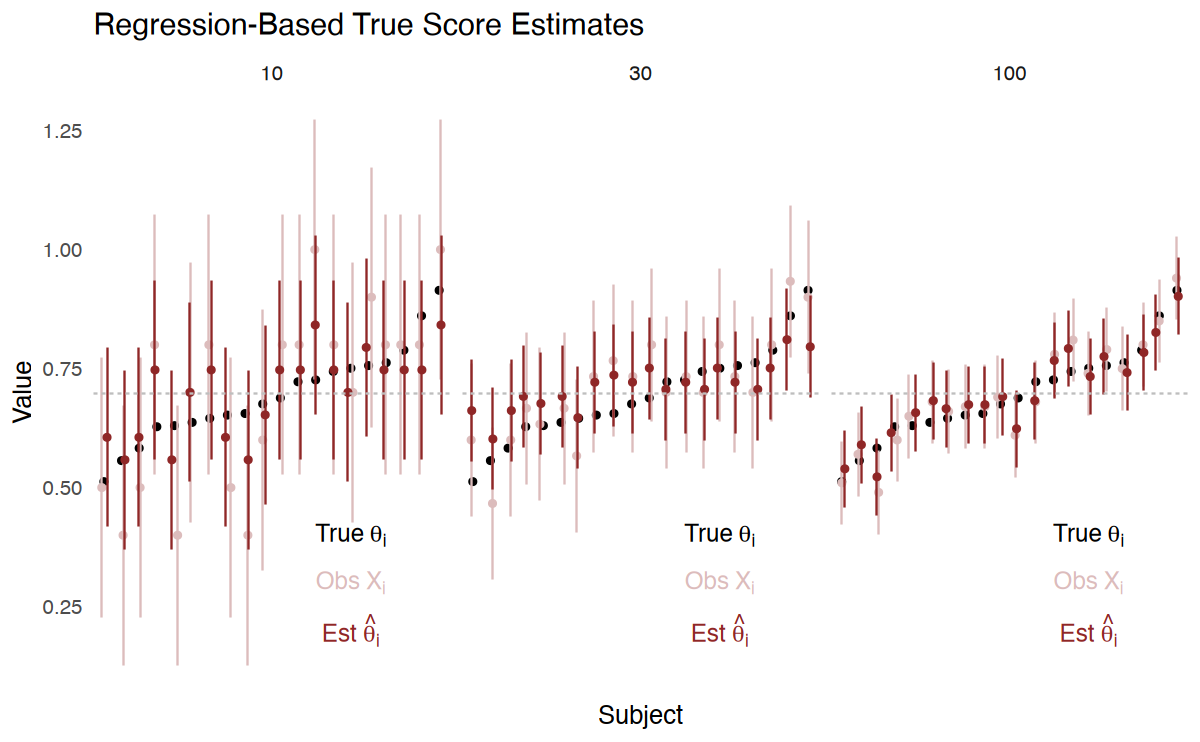

In [32]:
set.seed(43202)

# Number of subjects and items
n_subj <- 20
n_items <- c(10, 30, 100)

# Random sample of "true" scores around .7
theta <- rnorm(n_subj, .7, .1)

# Estimate standard error of measurement (squared)
est_se2 <- function(x) {
    # Success and failure probability
    n <- length(x)
    p <- mean(x)
    q <- 1 - p

    sig2_ep_i <- (p * q) / (n - 1)

    return(sig2_ep_i)
}

# Estimate observed and true score
dis_dat <- foreach(i = seq_along(n_items), .combine = "rbind") %do% {
    # Generate observed data for each subject using "true" score
    X_all <- foreach(t = seq_along(theta), .combine = "rbind") %do% {
        rbinom(n_items[i], 1, prob = theta[t])
    }

    # group average observed score
    X_bar <- mean(rowMeans(X_all))

    # Reliability
    X <- rowMeans(X_all)

    # Standard arror of measurement approach
    sig2_ep <- mean(apply(X_all, 1, est_se2))
    sig2_X <- var(X)
    rho <- 1 - (sig2_ep / sig2_X)

    foreach(t = seq_along(theta), .combine = "rbind") %do% {
        # Using observed scores from parallel form 1
        X_obs <- X_all[t, ]
        X_i <- mean(X_obs)

        data.frame(
            subj_num = t,
            n_items = n_items[i],
            theta = theta[t],
            rho = rho,
            X = X_i,
            se_obs = sd(X) * sqrt(1 - rho),
            se_hat = sd(X) * sqrt(1 - rho) * sqrt(rho),
            theta_hat = (1 - rho) * X_bar + rho * X_i
        )
    }
}

# Plot true, observed, and estimated true scores
dis_dat %>%
    mutate(subj_num = reorder(subj_num, theta)) %>%
    ggplot(aes(x = subj_num, y = theta)) +
    geom_point(color = I("black")) +
    geom_point(aes(x = subj_num, y = X),
        color = I("#DCBCBC"),
        position = position_jitter(width = .2, height = 0, seed = 1)
    ) +
    geom_linerange(
        aes(
            x = subj_num,
            ymin = X - 1.96 * se_obs,
            ymax = X + 1.96 * se_obs
        ),
        color = I("#DCBCBC"),
        position = position_jitter(width = .2, height = 0, seed = 1)
    ) +
    geom_point(aes(x = subj_num, y = theta_hat),
        color = I("#8F2727"),
        position = position_jitter(width = .2, height = 0, seed = 2)
    ) +
    geom_linerange(
        aes(
            x = subj_num,
            ymin = theta_hat - 1.96 * se_hat,
            ymax = theta_hat + 1.96 * se_hat
        ),
        color = I("#8F2727"),
        position = position_jitter(width = .2, height = 0, seed = 2)
    ) +
    geom_hline(yintercept = X_bar, linetype = 2, color = I("gray")) +
    annotate("text",
        x = 15, y = .4, label = expression("True" ~ theta[i]),
        color = "black", size = 5
    ) +
    annotate("text",
        x = 15, y = .3, label = expression("Obs" ~ X[i]),
        color = "#DCBCBC", size = 5
    ) +
    annotate("text",
        x = 15, y = .2, label = expression("Est" ~ hat(theta)[i]),
        color = "#8F2727", size = 5
    ) +
    facet_wrap(c("n_items"), nrow = 1) +
    ggtitle("Regression-Based True Score Estimates") +
    xlab("Subject") +
    ylab("Value") +
    theme_minimal(base_size = 15) +
    theme(
        panel.grid = element_blank(),
        axis.text.x.bottom = element_blank()
    )

Si notino tre risultati di questa simulazione: 

1. le stime puntuali basate sulla regressione di Kelley (i punti neri nel grafico) risultano più vicine alla media a livello di gruppo (rappresentata dalla linea tratteggiata grigia orizzontale) di quanto lo siano le stime individuali "non corrette" (punti grigi);
2. questo effetto di "pooling" è tanto maggiore quanto minore è l'attendibilità (in questa simulazione l'attendibilità è stata manipolata variando il numero di item);
3. gli intervalli di confidenza per i punteggi veri stimati sono più stretti rispetto a quelli dei punteggi osservati.

### Approccio Bayesiano

Nella seguente simulazione mostreremo come i risultati raggiunti con la regressione di Kelley possano essere replicati se i dati vengono analizzati con un modello gerarchico bayesiano.

Quando si analizzano dati provenienti da questionari con risposte dicotomiche (ad esempio, vero/falso o corretto/errato), è possibile applicare la distribuzione di Bernoulli. In questo contesto, ogni risposta data a un item del questionario può essere vista come il risultato di un esperimento di Bernoulli. Se indichiamo con $X$ una variabile casuale che segue tale distribuzione, la probabilità di ottenere un successo (ad esempio, una risposta corretta) è espressa come:

$$
\Pr(X=1) = p, \quad \text{e quindi} \quad \Pr(X=0) = 1 - p = q,
$$

dove $p$ indica la probabilità di successo e $q$ quella di insuccesso.

Introduciamo il modello di Bernoulli tramite l'equazione logistica:

$$
p = \frac{1}{1 + e^{-\theta}}.
$$

Questa formula ci permette di modellare $p$ in termini di $\theta$, un parametro che riflette una caratteristica o "abilità" dell'individuo. Il modello logistico assicura che $p$, la probabilità di successo, sia sempre compresa nell'intervallo $[0, 1]$. Il parametro $\theta$ viene definito come:

$$
\theta = \log\left(\frac{p}{1-p}\right),
$$

e può variare tra $-\infty$ e $+\infty$. Attraverso la trasformazione logistica, $\theta$ viene mappato in un valore di $p$ che rispetta i limiti di una probabilità. Questa funzione di collegamento permette di interpretare il legame tra $\theta$ e $p$.

Il modello descritto sopra può essere considerato una forma estremamente semplificata della Teoria della Risposta all'Item (IRT), dove ogni persona è caratterizzata da un unico parametro di abilità ($\theta$), e tutti gli item del test sono assunti avere uguale difficoltà e capacità di discriminazione, fissate convenzionalmente a 1.

Il nostro obiettivo principale nell'analisi dei dati è quindi stimare il parametro $\theta$ per ogni individuo. La relazione tra $\theta$ e $p$ è fondamentale: $\theta$ determina il valore di $p$ attraverso la funzione logistica, che trasforma i valori di $\theta$ in probabilità $p$ comprese tra 0 e 1. La stima di $\theta$ ci fornisce, di conseguenza, una misura della probabilità di successo di un individuo in risposta agli item del questionario.

Per approfondire la nostra comprensione su come emergono le risposte osservate, è fondamentale definire la modalità con cui i parametri $\theta$ vengono generati per ogni individuo. Similmente a quanto avviene nella teoria classica dei test, dove si presume l'esistenza di una distribuzione di campionamento a livello di popolazione, nell'ambito della modellazione generativa bayesiana si postula una distribuzione generativa per il gruppo. In termini pratici, possiamo ipotizzare che i parametri $\theta$ individuali derivino da una distribuzione normale standardizzata:

$$
\theta \sim \mathcal{N}(0, 1)
$$

Nel contesto bayesiano, questa distribuzione di gruppo viene comunemente identificata come una distribuzione a priori per $\theta$. In alternativa, possiamo dedurre questi parametri direttamente dai dati:

$$
\theta \sim \mathcal{N}(\mu, \sigma)
$$

Di conseguenza, si introduce un'ipotesi generativa riguardante i parametri di media $\mu$ e deviazione standard $\sigma$ del gruppo, che potrebbero essere descritti, in termini bayesiani tradizionali, come a priori del gruppo. Nel nostro esempio, supponiamo $\mu = 0$ e $\sigma \sim \text{HalfNormal}(1)$, dove $\text{HalfNormal}(1)$ rappresenta una distribuzione normale limitata ai valori positivi, coerente con il principio che le deviazioni standard debbano essere positive. 

Questo approccio introduce un modello gerarchico: durante l'adattamento del modello, i parametri individuali influenzano quelli di gruppo, che a loro volta modellano nuovamente quelli individuali. Analogamente alle stime dei punteggi "veri" ottenuti tramite regressione nella teoria classica dei test, i nostri parametri individuali verranno regolati ("pooled") verso la media di gruppo, portando a una riduzione degli intervalli di incertezza per le stime individuali.

Per facilitare la comprensione di come queste assunzioni generative si traducano in pratica, eseguiamo la seguente simulazione.

In [4]:
file <- file.path("hbern.stan")

In [5]:
mod <- cmdstan_model(file)

In [6]:
mod$print()

data {
  int<lower=0> N;      // Number of subjects
  int<lower=0> N_items; // Number of timepoints
  array[N, N_items] int Y; // Binary responses for each subject and item
}

parameters {
  real<lower=0> sigma_theta; // SD of individual effects
  real mu_theta; // Mean of individual effects
  
  vector[N] theta_pr; // Non-centered individual-level parameters
}

transformed parameters {
  vector[N] theta = mu_theta + sigma_theta * theta_pr; // Individual-level effects
}

model {
  // Priors
  mu_theta ~ normal(0, 1);
  sigma_theta ~ normal(0, 1);
  theta_pr ~ normal(0, 1);
  
  // Likelihood
  for (i in 1:N) {
    for (j in 1:N_items) {
      Y[i, j] ~ bernoulli_logit(theta[i]);
    }
  }
}

generated quantities {
  array[N] real p; // Success probability estimate for each individual
  
  for (i in 1:N) {
    p[i] = inv_logit(theta[i]);
  }
}


Il codice Stan presentato adotta una parametrizzazione non centrata (*non-centered parameterization*) per la parte di modello a livello di gruppo, una scelta motivata per migliorare l'efficienza computazionale e facilitare la convergenza degli algoritmi di stima, come il campionamento Hamiltoniano Monte Carlo (HMC) usato da Stan. Questa scelta di design è matematicamente equivalente al modello generativo descritto dalle equazioni precedenti, pur offrendo vantaggi pratici significativi in fase di implementazione.

La parametrizzazione non centrata è una strategia avanzata nella modellazione bayesiana, specialmente utile nei modelli gerarchici o multilivello. Essa differisce dalla parametrizzazione centrata, nella quale i parametri di gruppo sono direttamente definiti dai parametri individuali. Invece, con la parametrizzazione non centrata, i parametri individuali sono inizialmente espressi come variazioni indipendenti rispetto alla media e deviazione standard di gruppo, per poi essere trasformati.

Implementazione nel codice Stan:

1. **Definizione dei Parametri:**
   - `sigma_theta` denota la deviazione standard degli effetti individuali, indicando la variabilità dei parametri $\theta$ a livello personale.
   - `mu_theta` rappresenta la media degli effetti individuali.
   - `theta_pr` corrisponde ai parametri individuali nella forma non centrata, esprimendo le deviazioni rispetto alla media di gruppo in unità standardizzate.

2. **Trasformazione dei Parametri:**
   - Gli effetti individuali effettivi (`theta`) sono ottenuti trasformando `theta_pr` per allinearli attorno a `mu_theta` e adattarli alla scala definita da `sigma_theta`. Questo processo è sintetizzato dall'equazione `theta = mu_theta + sigma_theta * theta_pr`, che trasla e scala `theta_pr` per ottenere valori centrati e proporzionati correttamente.

3. **Applicazione nel Modello:**
   - All'interno del modello, sia `mu_theta` che `sigma_theta` sono sottoposti a priori normali (`normal(0, 1)`), presupponendo una distribuzione iniziale per questi parametri a livello di gruppo. Anche `theta_pr` è assoggettato a una distribuzione normale standard come priori, rispecchiando l'approccio di considerare le variazioni in termini standardizzati.
   - La verosimiglianza del modello è calcolata usando una distribuzione di Bernoulli con una funzione di collegamento logit, basata sui valori di `theta` trasformati, per analizzare le risposte binarie `Y` fornite da ogni soggetto per ogni item.

Attraverso questa struttura, il modello mira a una stima più stabile e accurata dei parametri, beneficiando della maggiore efficienza computazionale e della riduzione dei problemi di convergenza che spesso accompagnano la modellazione bayesiana gerarchica.

Simuliamo i dati di un singolo soggetto.

In [7]:
# Initialize parameters for a single subject
n_subj <- 1
n_items <- 30 # Example with 30 items for simplicity

# Generate "true" theta for the subject
theta <- rnorm(n_subj, .7, .1)

# Generate observed data for the subject using "true" theta
Y <- rbinom(n_items, 1, prob = theta)

Adattiamo il modello gerarchico bayesiano ai dati.

In [8]:
fit_bernoulli <- mod$sample(
    data = list(
        N = n_subj,
        N_items = n_items,
        Y = matrix(Y, nrow = 1) # Ensure Y is a matrix even for a single subject
    ),
    iter_sampling = 2500,
    iter_warmup = 500,
    chains = 4,
    parallel_chains = 4,
    seed = 43202
)

Running MCMC with 4 parallel chains...

Chain 1 Iteration:    1 / 3000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 3000 [  3%]  (Warmup) 
Chain 1 Iteration:  200 / 3000 [  6%]  (Warmup) 
Chain 1 Iteration:  300 / 3000 [ 10%]  (Warmup) 
Chain 1 Iteration:  400 / 3000 [ 13%]  (Warmup) 
Chain 1 Iteration:  500 / 3000 [ 16%]  (Warmup) 
Chain 1 Iteration:  501 / 3000 [ 16%]  (Sampling) 
Chain 1 Iteration:  600 / 3000 [ 20%]  (Sampling) 
Chain 1 Iteration:  700 / 3000 [ 23%]  (Sampling) 
Chain 1 Iteration:  800 / 3000 [ 26%]  (Sampling) 
Chain 1 Iteration:  900 / 3000 [ 30%]  (Sampling) 
Chain 1 Iteration: 1000 / 3000 [ 33%]  (Sampling) 
Chain 1 Iteration: 1100 / 3000 [ 36%]  (Sampling) 
Chain 2 Iteration:    1 / 3000 [  0%]  (Warmup) 
Chain 2 Iteration:  100 / 3000 [  3%]  (Warmup) 
Chain 2 Iteration:  200 / 3000 [  6%]  (Warmup) 
Chain 2 Iteration:  300 / 3000 [ 10%]  (Warmup) 
Chain 2 Iteration:  400 / 3000 [ 13%]  (Warmup) 
Chain 2 Iteration:  500 / 3000 [ 16%]  (Warmup) 
Chain 2 Iterati

See https://mc-stan.org/misc/warnings for details.




Calcoliamo la media a posteriori di $\theta$ e l'intervallo di confidenza al 95%:

In [9]:
# Extract posterior samples for parameter 'p'
bayes_est <- fit_bernoulli$draws(variables = "p")

bayes_est_p <- as.vector(bayes_est)

# Calculate the mean of the Bayesian estimates for 'p'
bayes_theta_est <- mean(bayes_est_p)

# Calculate the 95% HDI using quantiles for the flattened vector
hdi_bounds <- quantile(bayes_est_p, probs = c(0.025, 0.975))

# Prepare the results with a single HDI for 'p'
results <- data.frame(
    subj_num = 1,
    n_items = n_items,
    theta = theta,
    bayes_theta = bayes_theta_est,
    bayes_lo = hdi_bounds[1], # Lower bound of HDI
    bayes_hi = hdi_bounds[2] # Upper bound of HDI
)

# Print the corrected results
print(results)

     subj_num n_items theta bayes_theta bayes_lo bayes_hi
2.5%        1      30 0.699       0.712    0.547    0.849


Adesso svolgiamo la stessa simulazione considerando però 20 soggetti e facendo variare il numero di item del questionario (10, 30, 100).

In [ ]:
#| output: false

set.seed(43202)

n_subj <- 20
n_items_vec <- c(10, 30, 100)

# Placeholder for results
results <- list()

for (n_items in n_items_vec) {
    for (subj in 1:n_subj) {
        # Generate "true" theta for the subject
        theta <- rnorm(1, .7, .1)

        # Generate observed data for the subject using "true" theta
        Y <- rbinom(n_items, 1, prob = theta)

        # Fit the model
        fit_bernoulli <- mod$sample(
            data = list(
                N = 1,
                N_items = n_items,
                Y = matrix(Y, nrow = 1) # Ensure Y is a matrix
            ),
            iter_sampling = 2500,
            iter_warmup = 500,
            chains = 4,
            parallel_chains = 4,
            seed = 43202
        )

        # Extract and process posterior samples for 'p'
        bayes_est_p <- as.vector(fit_bernoulli$draws(variables = "p"))
        bayes_theta_est <- mean(bayes_est_p)
        hdi_bounds <- quantile(bayes_est_p, probs = c(0.025, 0.975))

        # Collect results
        results[[paste(subj, n_items)]] <- data.frame(
            subj_num = subj,
            n_items = n_items,
            theta = theta,
            bayes_theta = bayes_theta_est,
            bayes_lo = hdi_bounds[1],
            bayes_hi = hdi_bounds[2]
        )
    }
}

Combiniamo tutti i risultati in un singolo data frame.

In [12]:
all_results <- bind_rows(results)
all_results |> head()

,subj_num,n_items,theta,bayes_theta,bayes_lo,bayes_hi
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2.5%...1,1,10,0.637,0.576,0.311,0.819
2.5%...2,2,10,0.717,0.500,0.241,0.754
2.5%...3,3,10,0.741,0.731,0.472,0.926
2.5%...4,4,10,0.637,0.577,0.315,0.821
2.5%...5,5,10,0.690,0.499,0.237,0.760
2.5%...6,6,10,0.693,0.654,0.385,0.878


Creiamo un grafico con i risultati ottenuti.

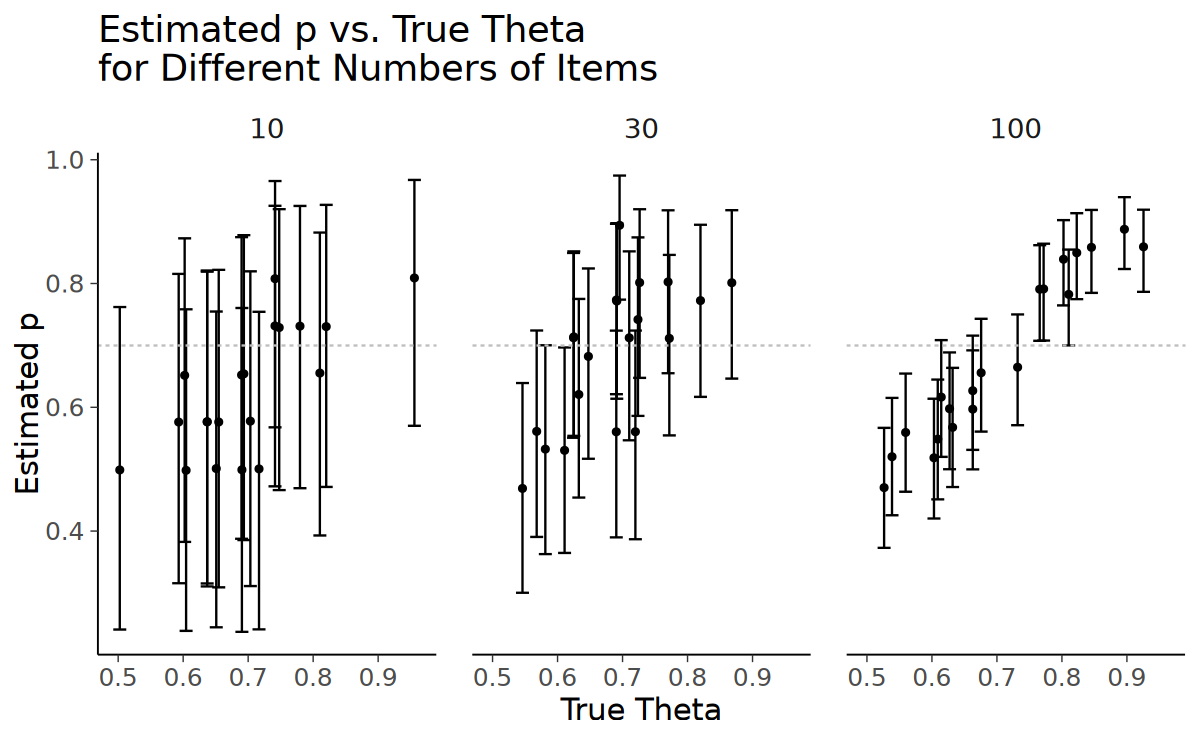

In [33]:
ggplot(all_results, aes(x = theta, y = bayes_theta)) +
    geom_point() +
    geom_errorbar(aes(ymin = bayes_lo, ymax = bayes_hi), width = 0.02) +
    geom_hline(yintercept = 0.7, linetype = "dashed", color = "gray") + # Add dashed line at y = 0.7
    # facet_wrap(~n_items, scales = "free_x", ncol = 1) + # Separate panels for each n_items, with a common y-axis
    facet_wrap(c("n_items"), nrow = 1) +
    labs(x = "True Theta", y = "Estimated p") +
    ggtitle("Estimated p vs. True Theta \nfor Different Numbers of Items") 

Lo scopo di questa simulazione è quello di confrontare i risultati del modello gerarchico bayesiano con i risultati ottenuti mediante la tecnica di Kelly. Per gli stessi dati utilizzati nel modello gerarchico bayesiamo, calcoliamo dunque la stima dei punteggi veri e gli intervalli di confidenza al 95% secondo il metodo di Kelley.

La formula di Kelley per stimare i punteggi veri dai punteggi osservati coinvolge l'affidabilità del test e la media e la deviazione standard dei punteggi osservati:

$$ 
\text{Punteggio Vero} = \text{Media} + (\text{Affidabilità}) \times (\text{Punteggio Osservato} - \text{Media}).
$$

Per calcolare il CI al 95% per i punteggi veri, dobbiamo tener conto dell'errore standard di misurazione, che deriva dall'affidabilità del test:

$$ 
\text{SEM} = \sigma \times \sqrt{1 - \text{Affidabilità}},
$$

dove $ \sigma $ è la deviazione standard dei punteggi osservati.

Date la stima di SEM, l'intervallo di confidenza al 95% per il punteggio vero di un individuo può essere calcolato come segue:

$$ 
\text{CI} = \text{Punteggio Vero} \pm (1.96 \times \text{SEM}).
$$

Svolgiamo ora i calcoli in R.

In [22]:
# Assuming a reliability coefficient
r_xx <- 0.8
Z_alpha <- qnorm(0.975) # For a 95% CI

# Calculate estimated true scores and CIs
all_results$kelley_true_score <- all_results$bayes_theta
all_results$kelley_lo <- all_results$bayes_theta - (Z_alpha * sqrt(1 - r_xx) * sd(all_results$bayes_theta))
all_results$kelley_hi <- all_results$bayes_theta + (Z_alpha * sqrt(1 - r_xx) * sd(all_results$bayes_theta))

A questo punto possiamo generare un grarico che contiene sia la stima del punteggio vero basata sul metodo di Kelley, insieme all'intervallo di confidenza al 95% (colore grigio), sia le stime bayesiane trovate in precedenza (colore blue).

Per semplicità, ho solo considerato il caso in cui la stima di Kelley si riferisce al caso di 100 items.

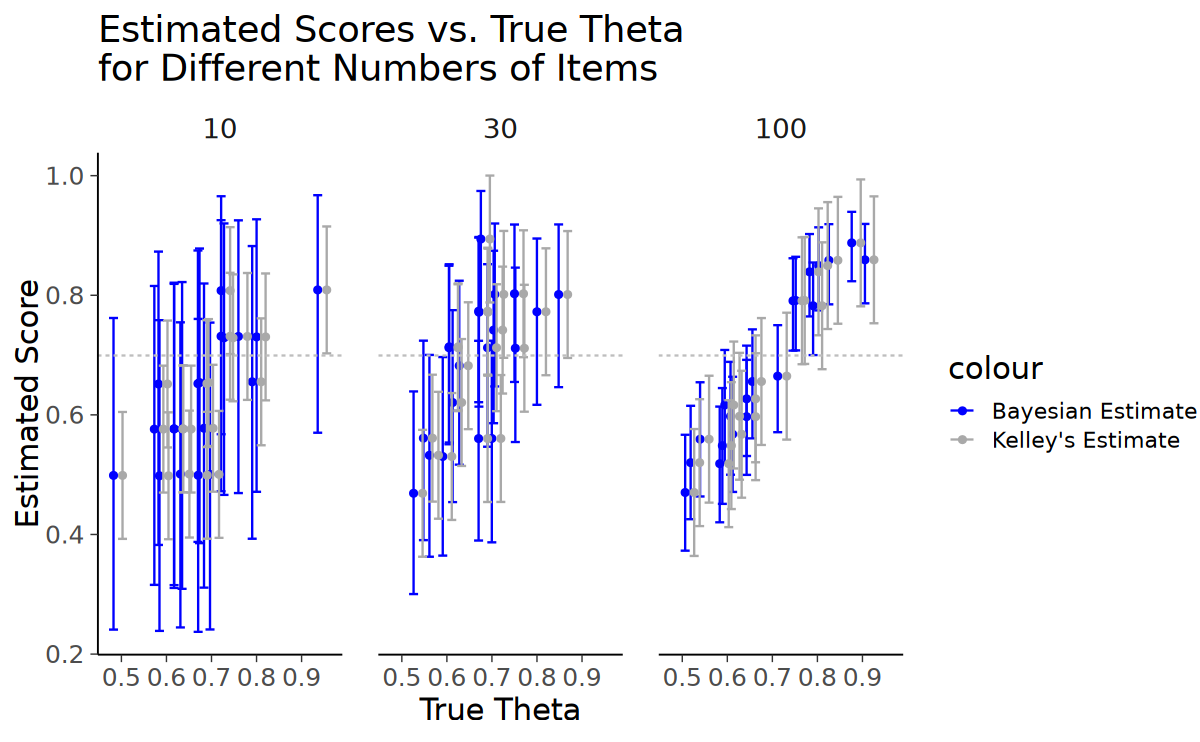

In [34]:
#| fig-width: 10
#| fig-height: 5

ggplot() +
    geom_point(data = all_results, aes(x = theta - 0.02, y = bayes_theta, color = "Bayesian Estimate")) +
    geom_errorbar(data = all_results, aes(x = theta - 0.02, ymin = bayes_lo, ymax = bayes_hi, color = "Bayesian Estimate"), width = 0.02) +
    geom_point(data = all_results, aes(x = theta, y = kelley_true_score, color = "Kelley's Estimate")) +
    geom_errorbar(data = all_results, aes(x = theta, ymin = kelley_lo, ymax = kelley_hi, color = "Kelley's Estimate"), width = 0.02) +
    geom_hline(yintercept = 0.7, linetype = "dashed", color = "gray") +
    facet_wrap(c("n_items"), nrow = 1) +
    labs(x = "True Theta", y = "Estimated Score") +
    ggtitle("Estimated Scores vs. True Theta\nfor Different Numbers of Items") +
    scale_color_manual(values = c("Bayesian Estimate" = "blue", "Kelley's Estimate" = "darkgray"))

I risultati della simulazione completa sono riportati nella figura seguente.

::: {#fig-like}
![](../../figures/haynes_kelley.png){width="80%"}
Stime dei punteggi veri basate sul metodo della regressione di Kelley e sulla regressione gerarchica bayesiana.
:::

I risultati della simulazione indicano che le stime medie a posteriori del modello bayesiano, così come gli intervalli di credibilità al 95% (definiti come intervalli di densità di probabilità più elevata), mostrano una notevole congruenza con le stime corrispondenti dei punteggi veri ottenute mediante la regressione di Kelley, insieme ai relativi intervalli di confidenza al 95%. Le stime puntuali prodotte da entrambi i metodi risultano quasi sovrapponibili. Considerando che i punteggi veri derivanti dalla regressione di Kelley posseggono un'interpretazione bayesiana, la similitudine tra i risultati non dovrebbe sorprendere eccessivamente. Tuttavia, una conferma empirica di questa corrispondenza fornisce una validazione più robusta.

Questo esempio illustra come i modelli bayesiani gerarchici siano capaci di generare stime dei "punteggi veri" comparabili a quelle prodotte dalla teoria classica dei test, offrendo l'ulteriore vantaggio di non richiedere il calcolo dell'affidabilità per giungere a tali stime. Al contrario, l'approccio bayesiano si basa sull'adozione di assunzioni generative e distribuzionali riguardo le relazioni sia tra i parametri del modello a diversi livelli (ad esempio, la struttura gerarchica delinea le connessioni tra i parametri individuali e quelli di gruppo) sia con i dati osservati. In questo modo, adottando la media posteriore come stima dell'aspettativa dei parametri a livello individuale, siamo in grado di ottenere le stime più accurate dei parametri reali che sottendono la generazione dei dati osservati.

## Riflessioni Conclusive

In questo capitolo, abbiamo analizzato diverse applicazioni pratiche della CTT. Ci siamo concentrati sulla comprensione dei concetti di attenuazione e sul metodo per determinare il numero di item necessari per ottenere un livello desiderato di affidabilità. Inoltre, abbiamo esaminato come stimare i punteggi veri individuali utilizzando due approcci differenti: la regressione di Kelley basata sulla CTT e la regressione gerarchica bayesiana. Approfondire questi argomenti ci ha permesso di ottenere una visione più completa e concreta sull'utilizzo e sull'applicazione della CTT, migliorando la nostra comprensione dei concetti chiave e delle implicazioni pratiche della teoria.

## Session Info

In [16]:
sessionInfo()

R version 4.4.2 (2024-10-31)
Platform: aarch64-apple-darwin20
Running under: macOS Sequoia 15.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.12.0

locale:
[1] C

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] doParallel_1.0.17   iterators_1.0.14    cmdstanr_0.8.1.9000
 [4] truncnorm_1.0-9     ggridges_0.5.6      foreach_1.5.2      
 [7] modelsummary_2.2.0  MASS_7.3-61         viridis_0.6.5      
[10] viridisLite_0.4.2   ggpubr_0.6.0        ggExtra_0.10.1     
[13] gridExtra_2.3       patchwork_1.3.0     bayesplot_1.11.1   
[16] semTools_0.5-6      semPlot_1.1.6       lavaan_0.6-19      
[19] psych_2.4.6.26      scales_1.3.0        markdown_1.13      
[22] knitr_1.49 